<a href="https://colab.research.google.com/github/SeunghoGhim/study2/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 [==============================] - 0s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


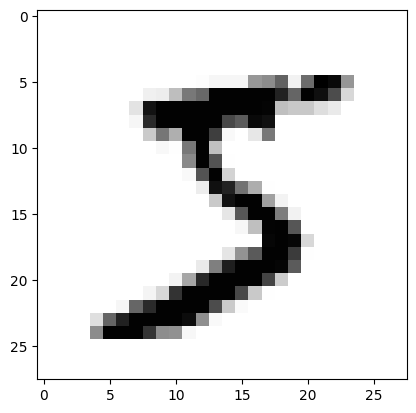

In [ ]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [ ]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

print("class : %d " % (y_train[0]))

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./data/model/MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.19318, saving model to ./data/model/MNIST_MLP.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.19318 to 0.14275, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.14275 to 0.11556, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11556 to 0.09841, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09841 to 0.09623, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09623 to 0.09382, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.09382 to 0.08607, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 8: val_loss improved from 0.08607 to 0.07927, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 9: val_loss did not improve from 0.07927

Epoch 10: val_loss improved from 0.07927 to 0.07865, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 11: val_loss did not improve from 0.07865

Epoch 12: val_loss did not improve from 0.07865

Epoch 13: val_loss did not improve from 0.07865

Epoch 14: val_loss did not 

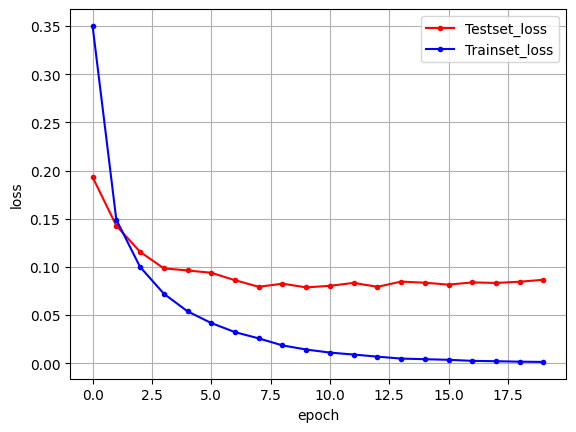

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import os

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

MODEL_DIR = './data/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./data/model/MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.07553, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.07553 to 0.05388, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05388 to 0.05256, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05256 to 0.04672, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04672 to 0.04411, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.04411 to 0.03949, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 7: val_loss did not improve from 0.03949

Epoch 8: val_loss did not improve from 0.03949

Epoch 9: val_loss improved from 0.03949 to 0.03855, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 10: val_loss improved from 0.03855 to 0.03776, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 11: val_loss improved from 0.03776 to 0.03771, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 12: val_loss did not impro

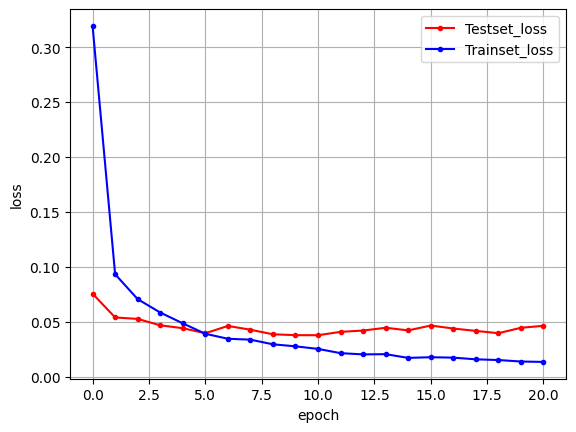

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import os

# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Set up callbacks and model saving paths
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./data/model/Fashion_MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=1,
                    callbacks=[early_stopping_callback, checkpointer])

# Evaluate the model on the test set
print("\nTest Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

# Plot training and validation loss
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = range(1, len(y_loss) + 1)
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/30
225/225 [==============================] - ETA: 0s - loss: 0.5843 - accuracy: 0.7941
Epoch 1: val_loss improved from inf to 0.34742, saving model to ./data/model/Fashion_MNIST_CNN.hdf5
225/225 [==============================] - 114s 492ms/step - loss: 0.5843 - accuracy: 0.7941 - val_loss: 0.3474 - val_accuracy: 0.8737
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 [==============================] - ETA: 0s - loss: 0.3649 - accuracy: 0.8700
Epoch 2: val_loss improved from 0.34742 to 0.29695, saving model to ./data/model/Fashion_MNIST_CNN.hdf5
225/225 [==============================] - 108s 480ms/step - loss: 0.3649 - accuracy: 0.8700 - val_loss: 0.2969 - val_accuracy: 0.8917
Epoch 3/30
225/225 [==============================] - ETA: 0s - loss: 0.3206 - accuracy: 0.8848
Epoch 3: val_loss improved from 0.29695 to 0.26897, saving model to ./data/model/Fashion_MNIST_CNN.hdf5
225/225 [==============================] - 107s 474ms/step - loss: 0.3206 - accuracy: 0.8848 - val_loss: 0.2690 - val_accuracy: 0.9010
Epoch 4/30
225/225 [==============================] - ETA: 0s - loss: 0.2838 - accuracy: 0.8969
Epoch 4: val_loss improved from 0.26897 to 0.25955, saving model to ./data/model/Fashion_MNIST_CNN.hdf5
225/225 [==============================] - 109s 483ms/step - loss: 0.2838 - accuracy: 0.8969 - val_loss: 0.2596 - val_accuracy: 0.9037
Epoch 

KeyboardInterrupt: ignored

Epoch 1/30
225/225 [==============================] - ETA: 0s - loss: 0.6024 - accuracy: 0.7904
Epoch 1: val_loss improved from inf to 0.35127, saving model to ./model/Fashion_MNIST_CNN.hdf5
225/225 [==============================] - 134s 585ms/step - loss: 0.6024 - accuracy: 0.7904 - val_loss: 0.3513 - val_accuracy: 0.8729
Epoch 2/30
225/225 [==============================] - ETA: 0s - loss: 0.3752 - accuracy: 0.8673
Epoch 2: val_loss improved from 0.35127 to 0.30116, saving model to ./model/Fashion_MNIST_CNN.hdf5
225/225 [==============================] - 134s 595ms/step - loss: 0.3752 - accuracy: 0.8673 - val_loss: 0.3012 - val_accuracy: 0.8885
Epoch 3/30
225/225 [==============================] - ETA: 0s - loss: 0.3172 - accuracy: 0.8867
Epoch 3: val_loss improved from 0.30116 to 0.27014, saving model to ./model/Fashion_MNIST_CNN.hdf5
225/225 [==============================] - 124s 551ms/step - loss: 0.3172 - accuracy: 0.8867 - val_loss: 0.2701 - val_accuracy: 0.9000
Epoch 4/30
225

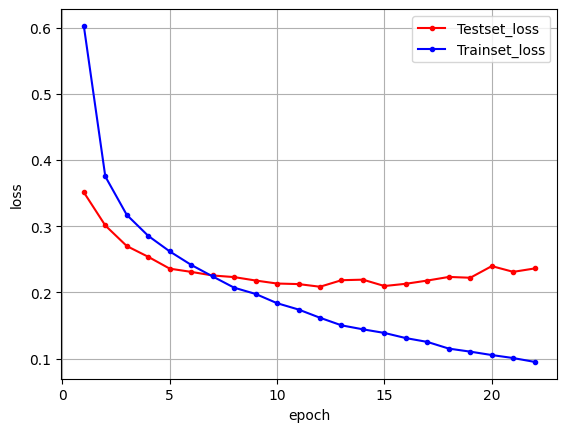

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import os

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

cmodel = Sequential()
cmodel.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
cmodel.add(Conv2D(64, (3, 3), activation='relu'))
cmodel.add(MaxPooling2D(pool_size=(2, 2)))
cmodel.add(Dropout(0.25))
cmodel.add(Flatten())
cmodel.add(Dense(128, activation='relu'))
cmodel.add(Dropout(0.5))
cmodel.add(Dense(10, activation='softmax'))

cmodel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/Fashion_MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = cmodel.fit(x_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=1,
                    callbacks=[early_stopping_callback, checkpointer])

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = range(1, len(y_loss) + 1)
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
print("Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

313/313 [==============================] - 8s 26ms/step - loss: 0.2531 - accuracy: 0.9226

Test Accuracy: 0.9226
